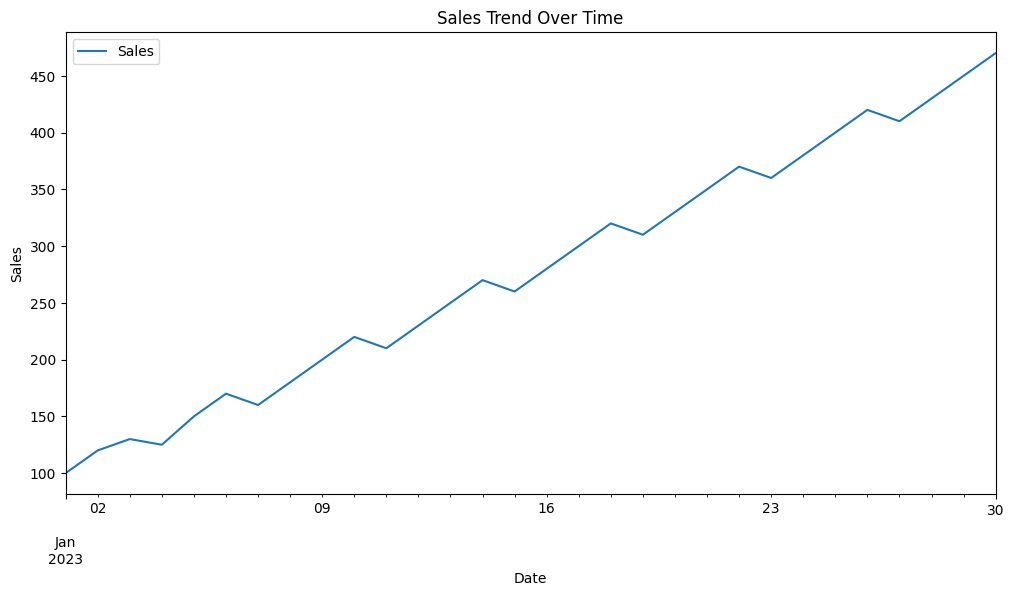

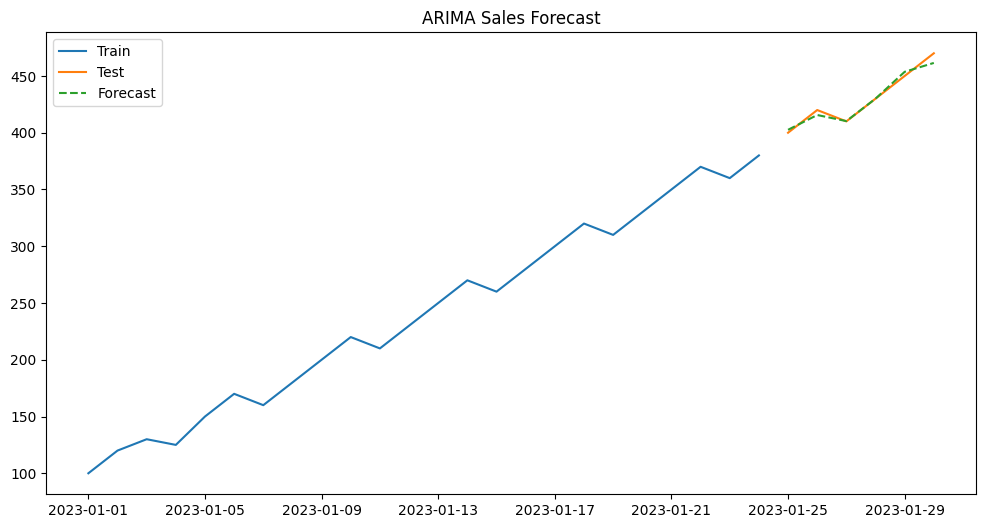

Root Mean Squared Error (RMSE): 4.314726763348861
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Confusion Matrix:
 [[2 1]
 [0 1]]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Task 1: Time Series Analysis (Sales Forecasting)
# Load dataset
time_series_data = pd.read_csv(r"D:/muzakkir/Data Analysis/Dataset/Task 6/sales_data.csv", parse_dates=["Date"], index_col="Date")
time_series_data = time_series_data.asfreq('D')  # Explicitly set frequency

# Visualize sales trends
time_series_data.plot(figsize=(12, 6), title="Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Train ARIMA Model
train_size = int(len(time_series_data) * 0.8)
train, test = time_series_data[:train_size], time_series_data[train_size:]
model = ARIMA(train, order=(5,1,0))  # Example order, can be tuned
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='dashed')
plt.legend()
plt.title("ARIMA Sales Forecast")
plt.show()

# Model Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Task 2: Heart Disease Prediction
# Load dataset
heart_data = pd.read_csv(r"D:/muzakkir/Data Analysis/Dataset/Task 6/heart_disease.csv")

# Convert categorical column 'Gender' to numerical values
heart_data["Gender"] = heart_data["Gender"].map({"Male": 0, "Female": 1})

# Preprocessing
heart_data.dropna(inplace=True)
X = heart_data.drop(columns=["Heart Disease"])
y = heart_data["Heart Disease"]

# Handling Class Imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Train Logistic Regression Model with balanced class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
